# Исследование компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
В наличии данные до 2016 года. Сейчас декабрь 2016 г., и магазин планирует кампанию на 2017-й.    
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  

**Описание данных:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.  

**План работы:**

**Шаг 1. Откыть файл с данными и изучить общую информацию**  
Путь к файлу: */datasets/games.csv*.  

**Шаг 2. Подготовить данные**  
Заменить названия столбцов (привести к нижнему регистру);  
Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;  
Обработать пропуски при необходимости:  
Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;  
Описать причины, которые могли привести к пропускам;  
Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;  
Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец. 

**Шаг 3. Провести исследовательский анализ данных**  
Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
Не учитывать в работе данные за предыдущие годы.  
Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.  
Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.  
Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.  
Соотнести выводы с продажами игр на других платформах.  
Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

**Шаг 4. Составить портрет пользователя каждого региона**  
Определить для пользователя каждого региона (NA, EU, JP):  
Самые популярные платформы (топ-5). Описать различия в долях продаж.  
Самые популярные жанры (топ-5). Пояснить разницу.  
Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

**Шаг 5. Проверить гипотезы**  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Задать самостоятельно пороговое значение alpha.  
Пояснить:  
Как вы сформулировали нулевую и альтернативную гипотезы;  
Какой критерий применили для проверки гипотез и почему. 

**Шаг 6. Написать общий вывод**  

## 1. Общая информация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


7 столбцов содержат качественные переменные: *Name, Platform, Year_of_Release, Genre, Critic_Score, User_Score, Rating*; 4 столбца - количественные переменые: *NA_sales, EU_sales, JP_sales, Other_sales*.

Выявленные проблемы:
* в названиях столбцов использован разный регистр;
* в следующих столбцах тип данных не соответствует содержимому: *Year_of_Release, User_Score*;
* пропуски в столбцах *Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating*.

### Вывод

Таблица содержит 16715 данных о компьютерных играх, выпущенных до 2016 года (за 2016 год неполные данные).  
План подготовки данных для анализа:
* привести названия столбцов к нижнему регистру;
* преобразовать данные в столбцах к нужному типу: в столбце *Year_of_Release* - в целые числа, в столбце *User_Score* - в дробные числа;
* обработать пропуски;
* посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

## Шаг 2. Подготовка данных

### Замена названий столбцов (приведение к нижнему регистру)

In [3]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Преобразование данных в нужные типы

#### year_of_release

В столбце *year_of_release* содержатся данные о годе выпуска игры, при этом тип данных в столбце - float64. Преобразуем дробные числа в целые. Перед заменой необходимо обработать пропуски: рассмотрим игры, в которых пропущен год выпуска.

In [4]:
print('Всего пропусков:', len(df[df['year_of_release'].isnull()]))

Всего пропусков: 269


In [5]:
df[df['year_of_release'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


У игр с пропущенными годами выпуска нет общего: разные платформы, разные жанры, разные оценки и рейтинги. Рассмотрим несколько игр подробнее.

In [6]:
df[df['name'] == 'LEGO Batman: The Videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


In [7]:
df[df['name'] == 'FIFA Soccer 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
2606,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
12029,FIFA Soccer 2004,GC,2003.0,Sports,0.05,0.01,0.00,0.00,83.0,6.2,E
13086,FIFA Soccer 2004,GBA,2003.0,Sports,0.04,0.01,0.00,0.00,82.0,7.9,E


После изучения информации о годах выпуска игр под названием "LEGO Batman: The Videogame" и "FIFA Soccer 2004" выяснилось, что года выпуска этих игр на разных платформах совпадают. Т.е. все игры под одним названием выпущены в один год.   
Можем ли мы заменить пропуск по первому найденному году выпуска игры с тем же названием?  
Сущесвтвуют игры, для которых разница в годах выпуска для разных платформ велика. Например, GTA: Vice City для платформы PS2 выпущена в 2002 году, а для платформы PS3 - в 2013 году. Предположим, что это исключение: посчитаем среднюю разницу между максимальным и минимальным годами выпуска для игр на разных платформах.

In [8]:
df_grouped = df.groupby('name')['year_of_release'].agg(['max','min'])
df_grouped.head()

,max,min
name,,
Beyblade Burst,2016.0,2016.0
Fire Emblem Fates,2015.0,2015.0
Frozen: Olaf's Quest,2013.0,2013.0
Haikyu!! Cross Team Match!,2016.0,2016.0
Tales of Xillia 2,2012.0,2012.0


In [9]:
df_grouped['difference'] = df_grouped['max'] - df_grouped['min']
df_grouped.head()

,max,min,difference
name,,,
Beyblade Burst,2016.0,2016.0,0.0
Fire Emblem Fates,2015.0,2015.0,0.0
Frozen: Olaf's Quest,2013.0,2013.0,0.0
Haikyu!! Cross Team Match!,2016.0,2016.0,0.0
Tales of Xillia 2,2012.0,2012.0,0.0


In [10]:
print('Средняя разница между максимальным и минимальным годом выпуска игры:', '{:.1f}'.format(df_grouped['difference'].mean()))
print('Всего игр с разницей от 1 года:', len(df_grouped[df_grouped['difference'] > 0]))
print('Максимальная разница:', df_grouped['difference'].max())

Средняя разница между максимальным и минимальным годом выпуска игры: 0.2
Всего игр с разницей от 1 года: 694
Максимальная разница: 34.0


Средняя разница между максимальным и минимальным годом выпуска игры для разных платформ невелика, но встречаются и игры с большой разницей в годах выпуска. Поэтому пропущенные значения в столбце *year_of_release* не можем заменить на любой другой найденный год выпуска игры с тем же названием. Для удобства расчетов заменим пропуски на ноль.

In [11]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


#### user_score

Столбец *user_score* содержит оценку пользователей в баллах до 10. Преобразуем ее из формата  object в формат float64.

При попытке преобразовать значения столбце *user_score* методом *to_numeric* произошла ошибка из-за встречающегося значения **tbd**.   
TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.  
Заменим неопределенные оценки на NaN.

In [12]:
print('Всего значений tbd:', df.query('user_score == "tbd"')['user_score'].count())
print('Всего определенных значений в столбце:', df['user_score'].count())
print('После преобразования в столбце должно быть определенных значений:', (df['user_score'].count() - df.query('user_score == "tbd"')['user_score'].count()))

Всего значений tbd: 2424
Всего определенных значений в столбце: 10014
После преобразования в столбце должно быть определенных значений: 7590


In [13]:
df['user_score'] = pd.to_numeric(df['user_score'],  errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Определенных значений в столбце 7590, как и ожидалось.

### Поиск и обработка дубликатов

Проверим, есть ли в таблице строки с идентичной информацией.

In [14]:
df.duplicated().sum()

0

Проверим наличие дубликатов в столбце *platform*, рассмотрев уникальные значения.

In [15]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Повторяющиеся значения не найдены.  
Проверим, нет ли дубликатов по имени и платформе: объединим и переведем в нижний регистр соответствующие столбцы и проверим наличие дубликатов.

In [16]:
df['combined_name'] = df['name'] + ' ' + df['platform']
df['combined_name'] = df['combined_name'].str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,combined_name
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,wii sports wii
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,super mario bros. nes
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,mario kart wii wii
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,wii sports resort wii
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,pokemon red/pokemon blue gb


In [17]:
df[df['combined_name'].duplicated(keep=False) == True].sort_values(by='combined_name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,combined_name
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,madden nfl 13 ps3
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,madden nfl 13 ps3
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,need for speed: most wanted pc
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,need for speed: most wanted pc
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,need for speed: most wanted x360
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,need for speed: most wanted x360
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,sonic the hedgehog ps3
4127,Sonic the Hedgehog,PS3,0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,sonic the hedgehog ps3
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN


Данные по двум играм разделены на 2 строки: игра Madden NFL 13 на платформе PS3 2012 года и игра Sonic the Hedgehog на платформе Platform 2006 года. Удалим дублирующиеся строки, предварительно сложив продажи. Игру или игры с неизвестным названием на платформе GEN 1993 года оставим неизменными. У игры Need for Speed: Most Wanted нет дублей, т.к. года выпуска разные для одной и той же платформы.

In [18]:
df.loc[604, 'eu_sales'] = 0.23
df.loc[1745, 'eu_sales'] = 0.56

df = df[~df.index.isin([16230,4127])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16711 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16711 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8135 non-null float64
user_score         7588 non-null float64
rating             9947 non-null object
combined_name      16711 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 1.7+ MB


### Обработка пропусков

Пропуски остались в столбцах *name, year_of_release, genre, critic_score, user_score, rating*.

In [19]:
columns = ['name', 'genre', 'critic_score', 'user_score', 'rating']

for column in columns:
    print('Всего пропущенных значений в столбце', column, ':', df[column].isna().sum(), 'или', '{:.1%}'.format(df[column].isna().sum()/len(df)))

Всего пропущенных значений в столбце name : 2 или 0.0%
Всего пропущенных значений в столбце genre : 2 или 0.0%
Всего пропущенных значений в столбце critic_score : 8578 или 51.3%
Всего пропущенных значений в столбце user_score : 9125 или 54.6%
Всего пропущенных значений в столбце rating : 6766 или 40.5%


Пропуски в столбцах *name* и *genre* относятся к неизвестной игре на платформе GEN 1993 года, найденной при поиске дубликатов, оставим ее без изменений.  
Очень большое количество пропусков в столбцах *critic_score, user_score, rating*. Рассмотрим их подробнее.

In [20]:
print('Всего игр с пропусками в 3 столбцах одновременно:', len(df[df['rating'].isna() & df['critic_score'].isna() & df['user_score'].isna()]), 'или', '{:.1%}'.format(len(df[df['rating'].isna() & df['critic_score'].isna() & df['user_score'].isna()])/len(df)))

Всего игр с пропусками в 3 столбцах одновременно: 6667 или 39.9%


In [21]:
df[df['critic_score'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,combined_name
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,super mario bros. nes
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,pokemon red/pokemon blue gb
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,tetris gb
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,duck hunt nes
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,nintendogs ds
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,pokemon gold/pokemon silver gb
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,super mario world snes
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,pokemon diamond/pokemon pearl ds
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,super mario land gb
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,super mario bros. 3 nes


Таблица содержит неполные данные, причины этого нам не известны, т.к. она из открытого источника. Для пропусков нет подходящего значения на замену, оставим их незаполненными.

### Добавление столбца с суммарными продажами во всех регионах

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [22]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,combined_name,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,wii sports wii,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,super mario bros. nes,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,mario kart wii wii,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,wii sports resort wii,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,pokemon red/pokemon blue gb,31.38


### Вывод

* Привели названия столбцов к нижнему регистру.
* Преобразовали данные в столбце *year_of_release* в целые числа, в столбце *user_score* - в дробные, при этом заменили значение **tbd** на NaN.
* Заменили пропущенные года выпуска на 0.
* Удалили дубликаты.

## Шаг 3. Исследовательский анализ данных

### Количество выпускаемых игр в разные годы

In [23]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        268
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Отобразим распределение игр по годам на графике.

[]

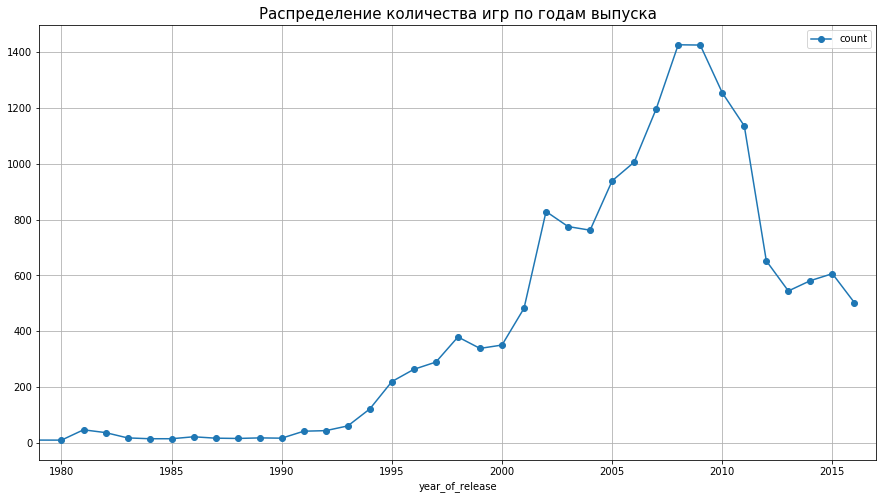

In [24]:
year_of_release = df.groupby('year_of_release')['name'].agg('count').reset_index()
year_of_release.columns = ['year_of_release', 'count']
year_of_release.plot(x='year_of_release', y='count', style='o-' ,xlim=(1979,2017), figsize=(15,8), grid=True)
plt.title('Распределение количества игр по годам выпуска', fontsize = 15)
plt.plot()

До 1994 года выпускалось меньше 100 игр в год. На графике видно, что с 1995 года развитие индустрии компьютерных игр пошло вверх, и на 2008-2009 годы приходится пик количества выпущенных игр, после которого следует резкий спад. Возможно он связан с тем, что в это время получают развитие направления игр для мобильных платформ. Появляется большое количество мобильных игровых приложений, создаются игры для социальных сетей. Т.к. этих игр нет в изучаемой таблице, то скорее всего количество выпускаемых компьютерных игр не уменьшилось, а лишь уменьшилась доля консольных игр и игр для PC.  
Данные до 1994 не представляют интереса для изучения в данном исследовании. Не будем их учитывать в дальнейшем.

In [25]:
from_1994_df = df.query('year_of_release >= 1994')
from_1994_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16078 entries, 0 to 16714
Data columns (total 13 columns):
name               16078 non-null object
platform           16078 non-null object
year_of_release    16078 non-null int64
genre              16078 non-null object
na_sales           16078 non-null float64
eu_sales           16078 non-null float64
jp_sales           16078 non-null float64
other_sales        16078 non-null float64
critic_score       7979 non-null float64
user_score         7459 non-null float64
rating             9763 non-null object
combined_name      16078 non-null object
total_sales        16078 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 1.7+ MB


### Изменения продаж по платформам

Рассмотрим суммарные продажи по платформам.

In [26]:
from_1994_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.84
Wii,891.18
DS,802.76
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберем 6 платформ с наибольшими суммарными продажами.

In [27]:
top_platform = from_1994_df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).head(6).index.tolist()
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Рассмотрим суммарные продажи для выбранных платформ по годам.

In [28]:
total_sales_by_year = from_1994_df.query('platform in @top_platform').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
total_sales_by_year

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,205.38,NaN,NaN,NaN


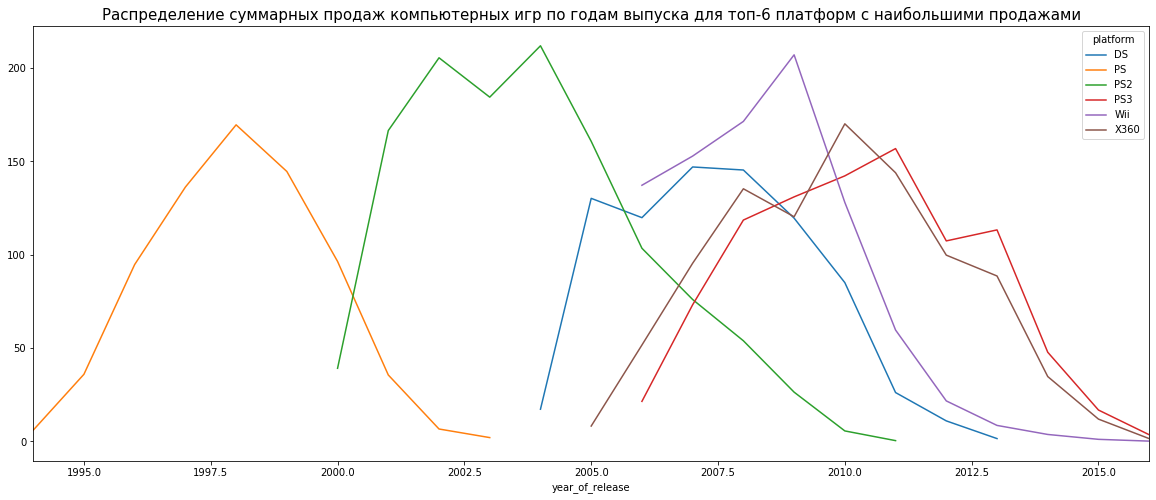

In [29]:
total_sales_by_year.plot(figsize=(20, 8))
plt.title('Распределение суммарных продаж компьютерных игр по годам выпуска для топ-6 платформ с наибольшими продажами', fontsize = 15)
plt.show()

Судя по графику жизненный цикл платформы составляет примерно 10 лет, пик количества выпущенных игр для каждой платформы приходится примерно на 5 год.  
Рассчитаем среднюю продолжительность существования платформы. Для этого для каждой платформы выведем минимальный и максимальный год выхода игр.

In [30]:
platform_life_time = df.query('year_of_release > 0').pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
platform_life_time.columns = ['platform','min_year_of_release','max_year_of_release']
platform_life_time.sort_values(by='min_year_of_release', ascending=False)

,platform,min_year_of_release,max_year_of_release
30,XOne,2013,2016
18,PS4,2013,2016
27,WiiU,2012,2016
2,3DS,2011,2016
20,PSV,2011,2016
17,PS3,2006,2016
26,Wii,2006,2016
28,X360,2005,2016
19,PSP,2004,2015
7,GC,2001,2007


Т.к. для платформ, вышедших в свет в 2011 году и позже, жизненный цикл не завершен, исключим их из таблицы platform_life_time, также исключим PC, которая не является консольной платформой. Выведем столбец с продолжительностью существования. 

In [31]:
platform_life_time = platform_life_time.query('min_year_of_release < 2011 and platform != "PC"').sort_values(by='min_year_of_release', ascending=False)
platform_life_time['life_time'] = platform_life_time['max_year_of_release'] - platform_life_time['min_year_of_release'] + 1
platform_life_time

,platform,min_year_of_release,max_year_of_release,life_time
26,Wii,2006,2016,11
17,PS3,2006,2016,11
28,X360,2005,2016,12
19,PSP,2004,2015,12
7,GC,2001,2007,7
29,XB,2000,2008,9
16,PS2,2000,2011,12
6,GBA,2000,2007,8
25,WS,1999,2001,3
3,DC,1998,2008,11


Отобразим продолжительность существования платформ на графике boxplot.

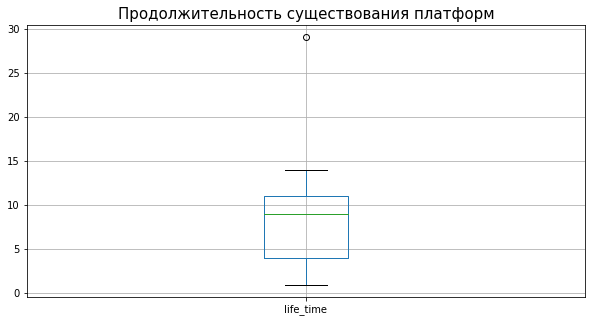

In [32]:
platform_life_time.boxplot(column='life_time', figsize=(10, 5))
plt.title('Продолжительность существования платформ', fontsize = 15)
plt.show()

In [33]:
platform_life_time['life_time'].describe()

count    25.000000
mean      8.400000
std       5.958188
min       1.000000
25%       4.000000
50%       9.000000
75%      11.000000
max      29.000000
Name: life_time, dtype: float64

Средняя продолжительность жизни платформы 8,4 года. График boxplot скошен влево: 25% платформ завершили существование менее чем через 4 года после выхода первой игры. На графике виден только один выброс продолжительности жизни: продолжительность существования платформы DS составила рекордные 29 лет.

Для платформ Wii и PS3 2016 год скорее всего будет последним, когда для них выпускаются компьютерные игры. А для PS4 и XOne в потенциале ожидается пик продаж в 2017 году.

В дальнейшем будем рассматривать только игры, выпущенные в 2012 году и позже. Т.к. если взять больший период, то при рассмотрении доли продаж по платформам большие объемы продаж будут у тех платформ, которые к 2017 году уже завершат свой жизненный цикл, а мы хотим увидеть те, которые будут на пике популярности.

In [34]:
actual_df = from_1994_df.query('year_of_release >= 2012')
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 13 columns):
name               2885 non-null object
platform           2885 non-null object
year_of_release    2885 non-null int64
genre              2885 non-null object
na_sales           2885 non-null float64
eu_sales           2885 non-null float64
jp_sales           2885 non-null float64
other_sales        2885 non-null float64
critic_score       1311 non-null float64
user_score         1530 non-null float64
rating             1610 non-null object
combined_name      2885 non-null object
total_sales        2885 non-null float64
dtypes: float64(7), int64(1), object(5)
memory usage: 315.5+ KB


### Какие платформы лидируют по продажам, растут или падают? Выбор несколько потенциально прибыльных платформ.

In [35]:
actual_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

Сгруппируем суммарные продажи по платформам и годам выпуска.

In [36]:
actual_df_grouped = actual_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
actual_df_grouped

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Отобразим данные на графике.

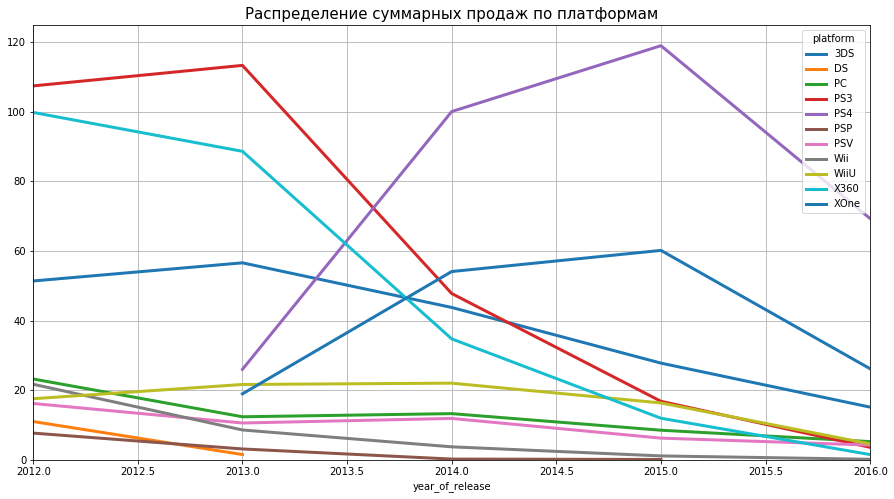

In [37]:
actual_df_grouped.plot(figsize=(15, 8), grid=True, rot=0, linewidth = 3, ylim=0)
plt.title('Распределение суммарных продаж по платформам', fontsize = 15)
plt.show()

Рост продаж наблюдается только для двух платформ - **XOne** и **PS4**. При этом продажи игр на платформе PS4 в 2015 году почти в 2 раза превышают продажи  игр на платформе XOne. Для обоих платформ, PS4 и XOne, в потенциале ожидается пик продаж в 2017 году.  
Остальные платформы либо завершили свой жизненные цикл, любо у них наблюдается спад. Кроме уже отмеченных двух платформ, в 2017 потенциально прибыльными будут оставаться платформы PS3, X360, 3DS, WiiU, PС. PС необходимо выделить отдельно, т.к. это персональный компьютер, а не игровые приставки, как все остальные. Первая игра для PС выпущена в 1994 году, но жизненный цикл для этой платформы не завершается, по крайней мере не к 2017 году.

### Глобальные продажи игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

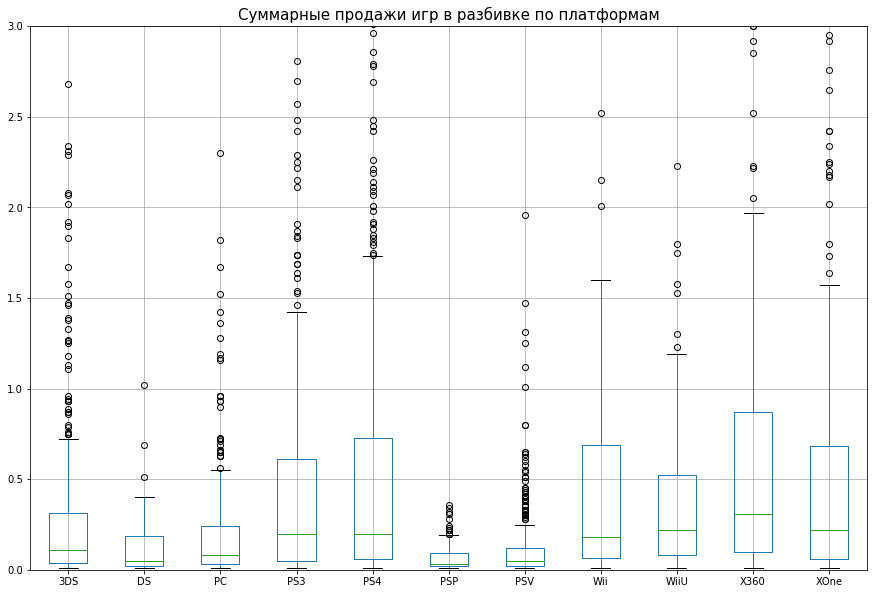

In [38]:
actual_df.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').boxplot(figsize=(15, 10))
plt.title('Суммарные продажи игр в разбивке по платформам', fontsize = 15)
plt.ylim(0,3)
plt.show()
pd.options.mode.chained_assignment = None

In [39]:
actual_df.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,396.000000,31.000000,250.00000,492.000000,392.000000,173.000000,411.000000,54.000000,147.000000,292.000000,247.000000
mean,0.491439,0.404839,0.25060,0.586972,0.801378,0.064682,0.119659,0.655000,0.559116,0.810068,0.645020
std,1.387161,1.439245,0.49464,1.464141,1.609456,0.071296,0.203011,1.165447,1.058836,1.712069,1.036139
min,0.010000,0.010000,0.01000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.020000,0.03000,0.050000,0.060000,0.020000,0.020000,0.062500,0.080000,0.100000,0.060000
50%,0.110000,0.050000,0.08000,0.200000,0.200000,0.030000,0.050000,0.180000,0.220000,0.310000,0.220000
75%,0.312500,0.185000,0.24000,0.610000,0.730000,0.090000,0.120000,0.687500,0.525000,0.870000,0.685000
max,14.600000,8.060000,5.14000,21.050000,14.630000,0.360000,1.960000,6.760000,7.090000,16.270000,7.390000


Для всех платформ характерна скошенность вправо: медиана меньше среднего значения. Чаще всего у игр низкие продажи, но много выбросов со сверхвысокими продажами.  
За последние 5 лет самые высокие средние продажи у игр на платформах X360 и PS4 - 0,8 млн проданных копий, на втором месте игры на Wii и XOne - 0,65 млн проданных копий. Значительно уступает платформы PSP (0,06 млн копий) и PSV (0,12 млн копий). Разница между платформами формируется не только популярностью платформ, но и разными этапами жизненных циклов платформ, которые вошли в рассматриваемый период времени. Например, низкие показатели средних продаж игр на платформе PSP связаны с тем, что платформа находится на завершающем этапе ЖЦ, уже выпущена платформа-преемник PSV.    
Самое большое количество проданных копий одной игры у платформы PS3 (21 млн), второе место принадлежит X360 (16,3 млн).

### Влияние отзывов пользователей и критиков на продажи

Рассмотрим, как влияют отзывы пользователей и критиков на продажи игр внутри популярной платформы PS4.

In [40]:
ps4 = actual_df.query('platform == "PS4"')

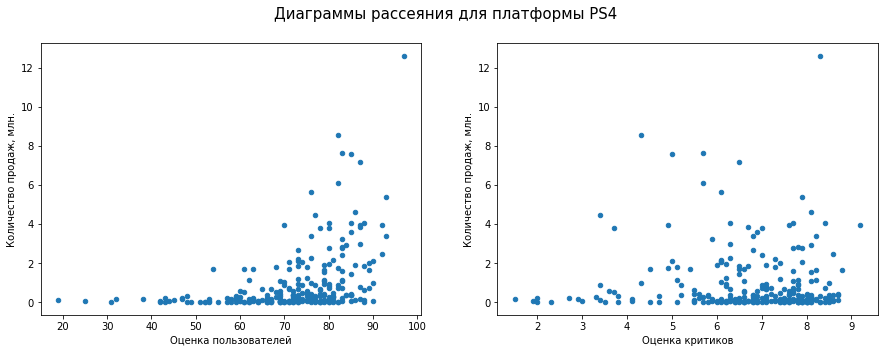

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ps4.plot(x='critic_score', y='total_sales', kind='scatter', ax=ax1)
ps4.plot(x='user_score', y='total_sales', kind='scatter', ax=ax2)

fig.suptitle('Диаграммы рассеяния для платформы PS4', fontsize = 15)
ax1.set(xlabel='Оценка пользователей')
ax2.set(xlabel='Оценка критиков')
ax1.set(ylabel='Количество продаж, млн.')
ax2.set(ylabel='Количество продаж, млн.')
plt.show()

In [42]:
print('Коэффициент корреляции между оценкой пользователей и количеством продаж:', '{:.2f}'.format(ps4['user_score'].corr(ps4['total_sales'])))
print('Коэффициент корреляции между оценкой критиков и количеством продаж:', '{:.2f}'.format(ps4['critic_score'].corr(ps4['total_sales'])))

Коэффициент корреляции между оценкой пользователей и количеством продаж: -0.03
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.41


На продажи игры влияют оценки критиков (коэффициент корреляции 0,41), а вот оценки пользователей не оказывают влияния на продажи.

Рассмотрим взаимосвязь оценок и продаж на других платформах. Выберем только те платформы, у которых есть известные оценки пользователей и критиков.

In [43]:
platforms = actual_df.query('critic_score >=0 and user_score >= 0 and platform != "PS4"')['platform'].unique()

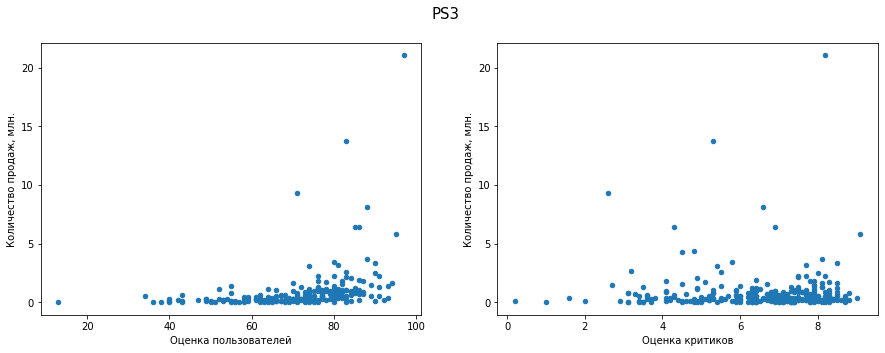

Коэффициент корреляции между оценкой пользователей и количеством продаж: -0.01
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.33


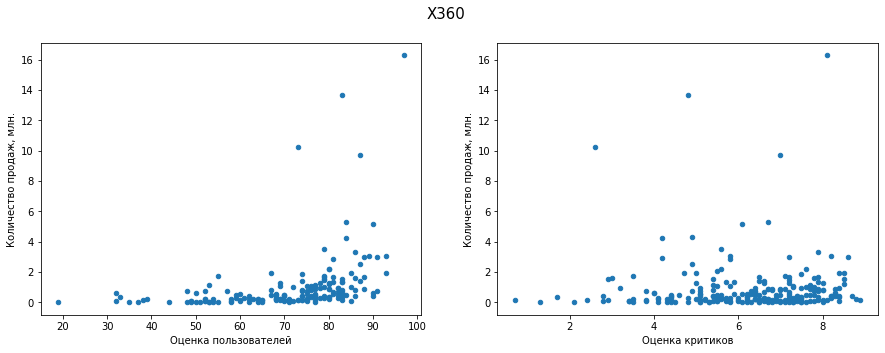

Коэффициент корреляции между оценкой пользователей и количеством продаж: 0.01
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.36


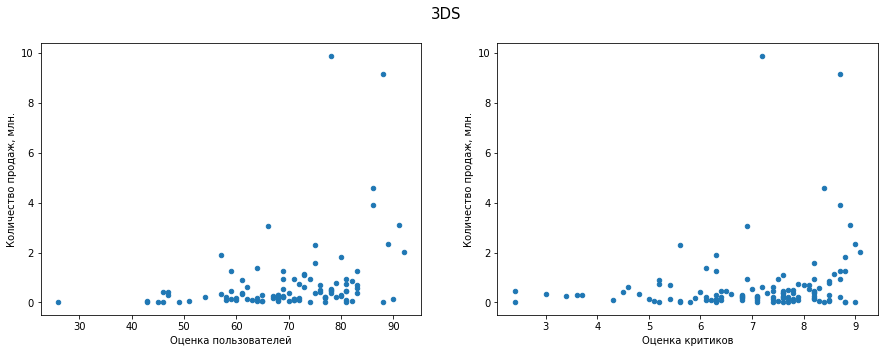

Коэффициент корреляции между оценкой пользователей и количеством продаж: 0.20
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.32


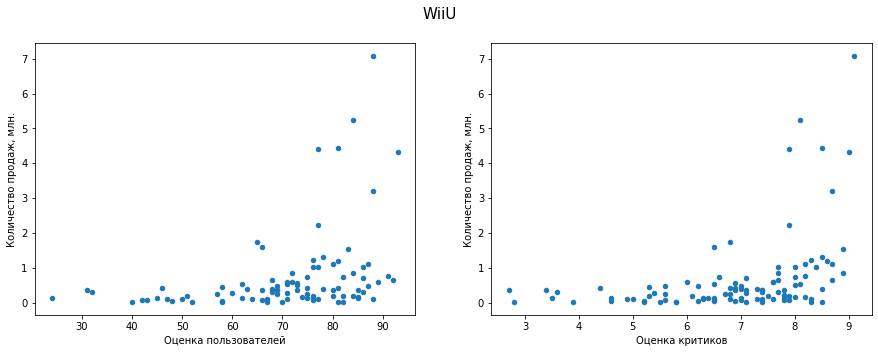

Коэффициент корреляции между оценкой пользователей и количеством продаж: 0.40
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.35


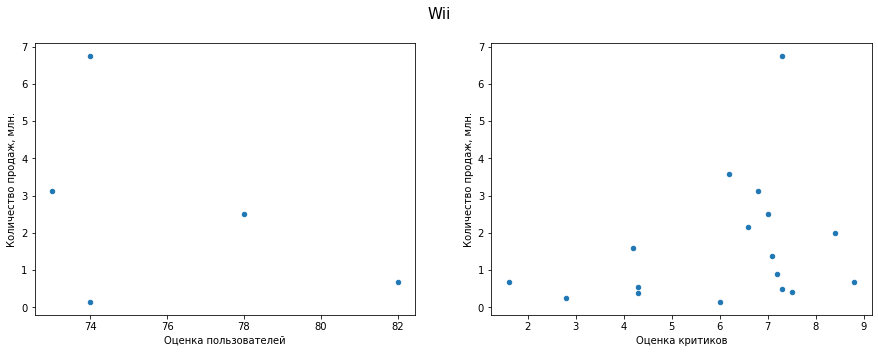

Коэффициент корреляции между оценкой пользователей и количеством продаж: 0.30
Коэффициент корреляции между оценкой критиков и количеством продаж: -0.42


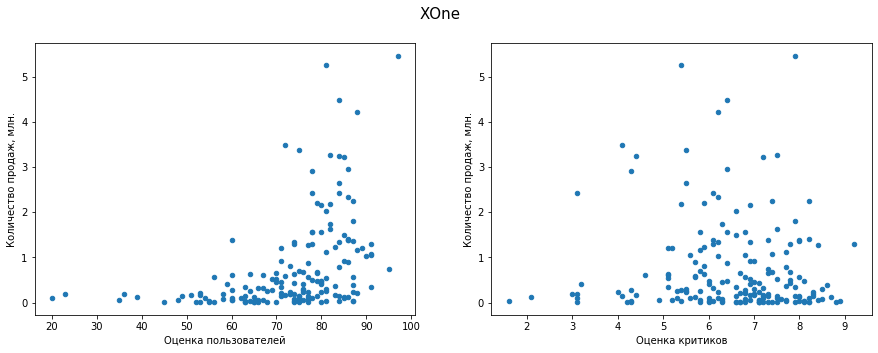

Коэффициент корреляции между оценкой пользователей и количеством продаж: -0.07
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.42


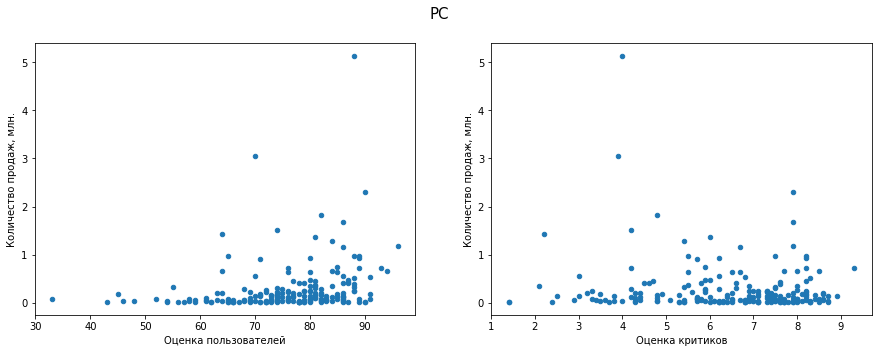

Коэффициент корреляции между оценкой пользователей и количеством продаж: -0.12
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.24


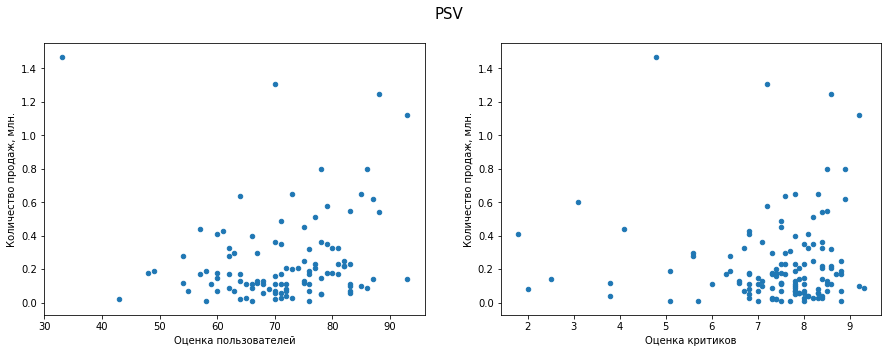

Коэффициент корреляции между оценкой пользователей и количеством продаж: -0.00
Коэффициент корреляции между оценкой критиков и количеством продаж: 0.09


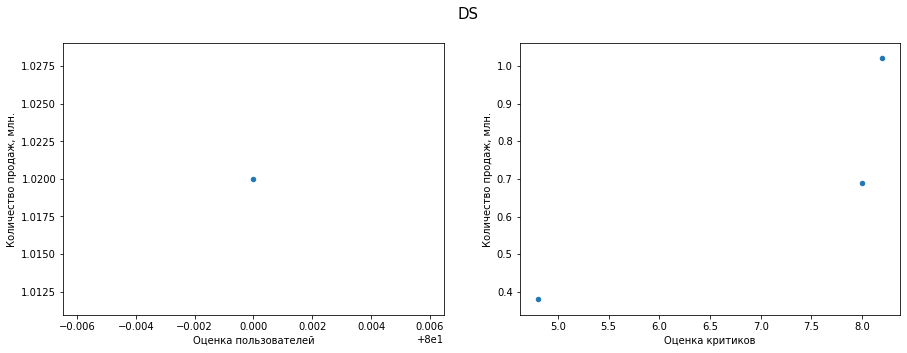

Коэффициент корреляции между оценкой пользователей и количеством продаж: 0.88
Коэффициент корреляции между оценкой критиков и количеством продаж: nan


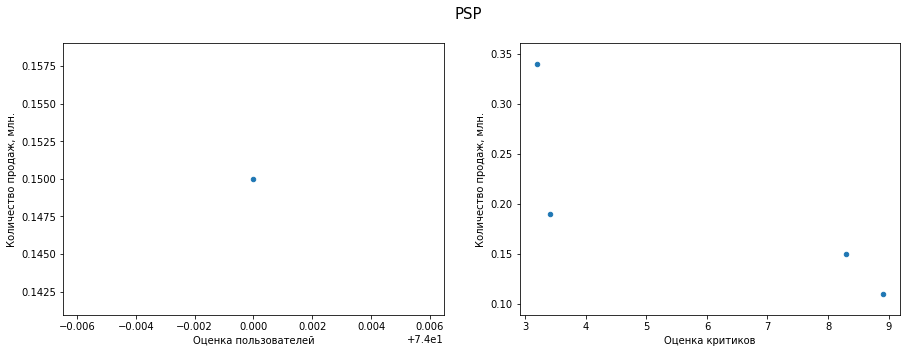

Коэффициент корреляции между оценкой пользователей и количеством продаж: -0.80
Коэффициент корреляции между оценкой критиков и количеством продаж: nan


In [44]:
for i in platforms:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    
    actual_df[actual_df['platform'] == i].plot(x='critic_score', y='total_sales', kind='scatter', ax=ax1)
    actual_df[actual_df['platform'] == i].plot(x='user_score', y='total_sales', kind='scatter', ax=ax2)
    
    fig.suptitle(i, fontsize = 15)
    ax1.set(xlabel='Оценка пользователей')
    ax2.set(xlabel='Оценка критиков')
    ax1.set(ylabel='Количество продаж, млн.')
    ax2.set(ylabel='Количество продаж, млн.')
    plt.show()

    print('Коэффициент корреляции между оценкой пользователей и количеством продаж:', '{:.2f}'.format(actual_df[actual_df['platform'] == i]['user_score'].corr(actual_df[actual_df['platform'] == i]['total_sales'])))
    print('Коэффициент корреляции между оценкой критиков и количеством продаж:', '{:.2f}'.format(actual_df[actual_df['platform'] == i]['critic_score'].corr(actual_df[actual_df['platform'] == i]['total_sales'])))

Для платформ PS3, X360, XOne и PSV, также как и для PS4, оценки пользователей не влияют на продажи. Но на продажи игр на платформах WiiU и 3DS оказывают влияние оценки пользователей, при этом для платформы WiiU это влияние даже большее, чем от оценки критиков. Возможно для этих платформ характерно наличие развитого сплоченного игрового сообщества.  
При покупке игры пользователи обычно прислушиваются к оценкам критиков: исключением здесь является платформа PSV с низким коэффициентом корреляции между оценкой критиков и количеством продаж - всего 0,09, тогда как для остальных платформ он составляет 0,32 - 0,42.  
Для PC: низкая взаимосвязь с оценкой критиков (коэффициент корреляции 0,24) и с оценкой пользователей, причем она еще и обратная (-0,12).
Данных для платформ Wii, DS и PSP слишком мало, чтобы исследовать взаимосвязи.

### Общее распределение игр по жанрам

Рассмотрим распределение игр по жанрам.

In [45]:
genre_counts = actual_df.groupby('genre').size().sort_values(ascending=False)
genre_counts

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
dtype: int64

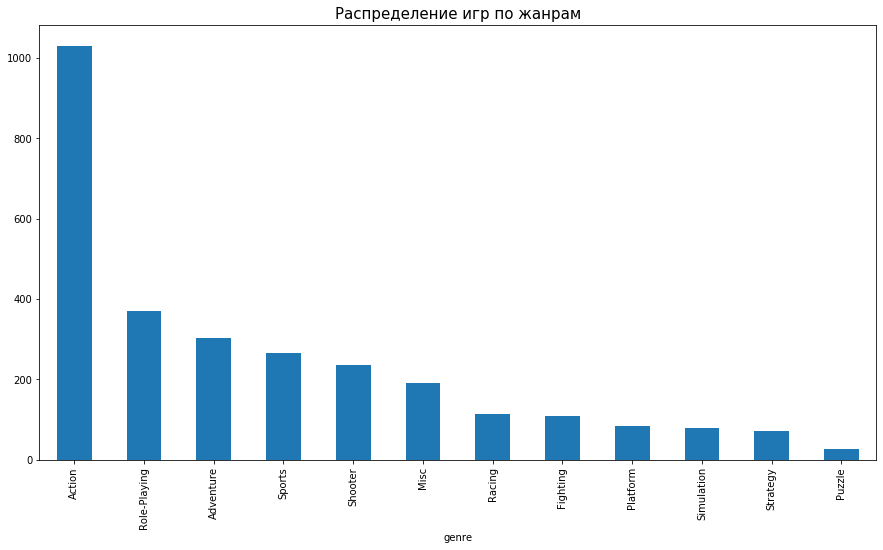

In [46]:
genre_counts.plot(kind='bar', figsize=(15, 8))
plt.title('Распределение игр по жанрам', fontsize = 15)
plt.ylabel('')
plt.show()

Рассмотрим на продажи по жанрам.

In [47]:
genre_sales = actual_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

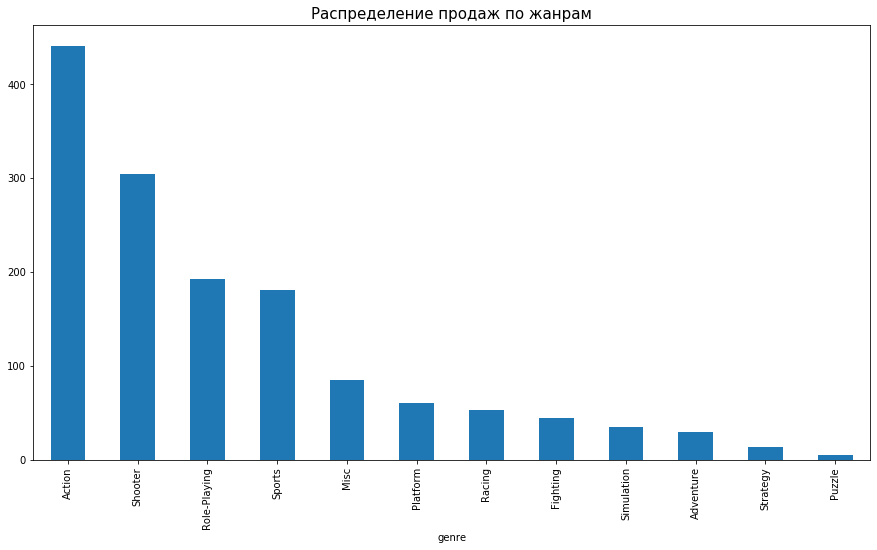

In [48]:
genre_sales.plot(kind='bar', figsize=(15, 8))
plt.title('Распределение продаж по жанрам', fontsize = 15)
plt.ylabel('')
plt.show()

Объединим genre_counts и genre_sales и рассмотрим средний количество проданных копий на игру для каждого жанра.

In [49]:
genres = genre_counts.to_frame().merge(genre_sales.to_frame(), on='genre')
genres

,0,total_sales
genre,,
Action,1031,441.12
Role-Playing,370,192.80
Adventure,302,29.43
Sports,267,181.07
Shooter,235,304.73
Misc,192,85.04
Racing,115,53.50
Fighting,109,44.49
Platform,85,61.00


In [50]:
genres.columns = ['count', 'total_sales']

In [51]:
genres['total_sales_mean'] = genres['total_sales'] / genres['count']
genres.sort_values('total_sales_mean', ascending=False)

,count,total_sales,total_sales_mean
genre,,,
Shooter,235,304.73,1.296723
Platform,85,61.00,0.717647
Sports,267,181.07,0.678165
Role-Playing,370,192.80,0.521081
Racing,115,53.50,0.465217
Misc,192,85.04,0.442917
Simulation,80,35.12,0.439000
Action,1031,441.12,0.427856
Fighting,109,44.49,0.408165


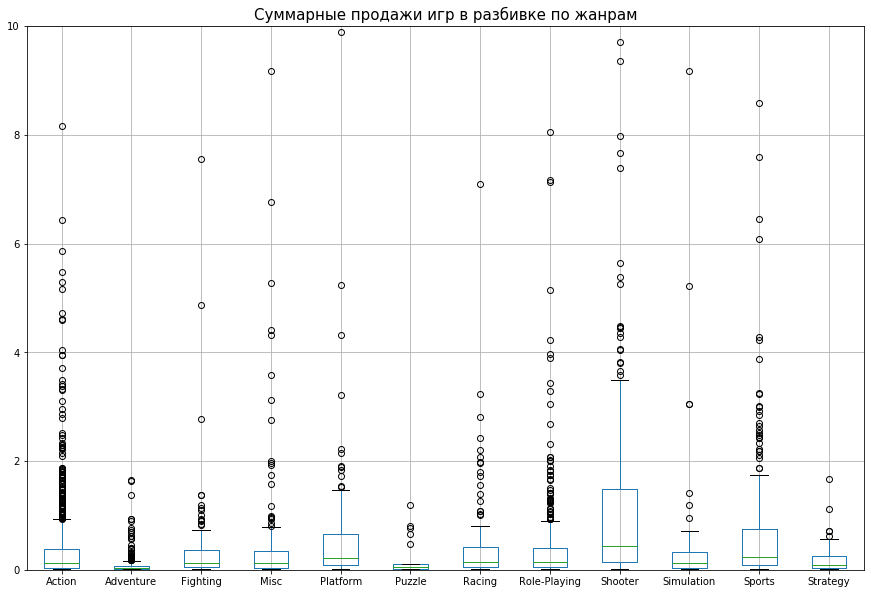

In [52]:
actual_df.pivot_table(index='combined_name', columns='genre', values='total_sales', aggfunc='sum').boxplot(figsize=(15, 10))
plt.title('Суммарные продажи игр в разбивке по жанрам', fontsize = 15)
plt.ylim(0,10)
plt.show()

In [53]:
actual_df.pivot_table(index='combined_name', columns='genre', values='total_sales', aggfunc='sum').describe()

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
count,1031.000000,302.000000,109.000000,192.000000,85.000000,28.000000,115.000000,370.000000,235.000000,80.0000,267.000000,71.000000
mean,0.427856,0.097450,0.408165,0.442917,0.717647,0.174643,0.465217,0.521081,1.296723,0.4390,0.678165,0.187887
std,1.166504,0.208237,0.910385,1.081047,1.364413,0.305438,0.888664,1.315937,2.251662,1.2445,1.137840,0.271976
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.0100,0.010000,0.010000
25%,0.030000,0.020000,0.060000,0.030000,0.090000,0.020000,0.050000,0.060000,0.135000,0.0300,0.080000,0.030000
50%,0.120000,0.030000,0.130000,0.120000,0.210000,0.045000,0.140000,0.140000,0.440000,0.1200,0.240000,0.080000
75%,0.390000,0.077500,0.360000,0.337500,0.660000,0.102500,0.420000,0.407500,1.480000,0.3275,0.745000,0.250000
max,21.050000,1.660000,7.550000,9.180000,9.900000,1.190000,7.090000,14.600000,14.630000,9.1700,8.580000,1.670000


In [54]:
actual_df.pivot_table(index='combined_name', columns='genre', values='total_sales', aggfunc='sum')['Action'].count()

1031

In [55]:
actual_df.query('genre == "Action"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,combined_name,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,grand theft auto v ps3,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,grand theft auto v x360,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,grand theft auto v ps4,12.62
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,fifa soccer 13 ps3,8.17
127,Assassin's Creed III,PS3,2012,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,assassin's creed iii ps3,6.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16680,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,kyoukai no shirayuki psv,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,dynasty warriors: eiketsuden ps3,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,metal gear solid v: ground zeroes pc,0.01
16699,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,the longest 5 minutes psv,0.01


* Самые высокие продажи у жанра Action (от анг. - действие, игрок находится в самом центре действия и управляет им): на него же приходится самое большое количество выпущенных игр. При этом среднее количество продаваемых копий - 0,42 млн копий.
* На втором месте по количеству проданных копий - Shooter (от анг. - стрелок, позволяют игрокам использовать в своих действиях оружие, обычно с целью уничтожить врагов или противоборствующих игроков). Несмотря на популярность, выпускается их мало -(возможно это связано со сложными требованиями для игры и длительным процессом разработки). Из-за этого для данной платформы самый высокий показатель среднего количества проданных копий на игру - 1,3 млн копий.  
* Жанры с самыми высокими средними продажами - Shooter, Platform, Sports - отличает активность и динамичность, требующих хорошей реакции, глазомера и точности движений. 
* Жанры с самыми низкими средними продажами -  Strategy, Puzzle, Adventure - объединяет логическое решение задач и головоломок.

### Вывод

В 2017 потенциально прибыльными будут платформы PS4, XOne, PS3, X360, 3DS, WiiU, PС. Среди них лидирующими являются **PS4** и **XOne**. Для обоих платформ, PS4 и XOne, в потенциале ожидается пик продаж в 2017 году. 

Оценки пользователей не влияют на продажи игр на платформах PS4, XOne и PSV. При покупке игры пользователи обычно прислушиваются к оценкам критиков, но не пользователи WiiU - для них важнее оценки пользователей.

Самый популярный жанр - **Shooter**: среднее количество проданных копий на игру - 1,3 млн. Затем по популярности следуют - Platform, Sports. Наименее популярны - Puzzle, Strategy, Adventure.

## 4. Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) для пользователей каждого региона

Рассмотрим суммарные продажи по платформам для  регионов: Северная Америка (na_sales), Европа (eu_sales), Япония (jp_sales).

In [56]:
actual_df.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
3DS,55.31,42.64,87.79,8.87,194.61
DS,4.59,3.53,3.72,0.71,12.55
PC,19.12,37.76,0.00,5.77,62.65
PS3,103.38,106.86,35.29,43.26,288.79
PS4,108.74,141.09,15.96,48.35,314.14
PSP,0.13,0.42,10.47,0.17,11.19
PSV,10.98,11.36,21.04,5.80,49.18
Wii,17.45,11.92,3.39,2.61,35.37
WiiU,38.10,25.13,13.01,5.95,82.19


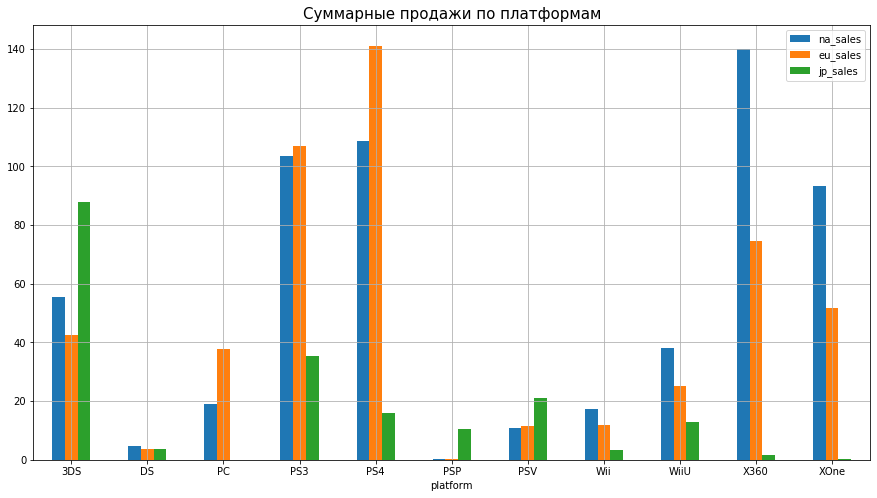

In [57]:
actual_df.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().plot(kind='bar', figsize=(15, 8), rot=0, grid=True)
plt.title('Суммарные продажи по платформам', fontsize = 15)
plt.show()

Рассмотрим долю, которую занимает каждая платформа в регионе.

In [58]:
actual_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
DS,4.59,3.53,3.72
PC,19.12,37.76,0.00
PS3,103.38,106.86,35.29
PS4,108.74,141.09,15.96
PSP,0.13,0.42,10.47
PSV,10.98,11.36,21.04
Wii,17.45,11.92,3.39
WiiU,38.10,25.13,13.01


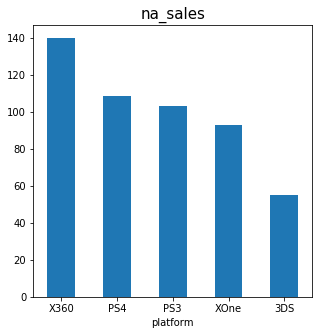

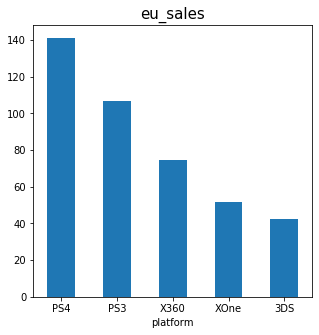

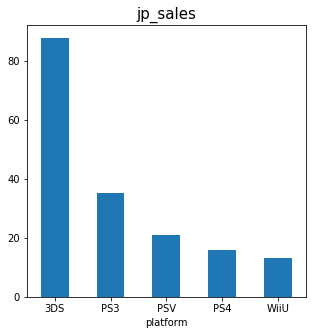

In [59]:
region_of_sale = ['na_sales', 'eu_sales', 'jp_sales']
for i in region_of_sale:
    actual_df.groupby('platform')[i].sum().sort_values(ascending=False).head().plot(kind='bar', figsize=(5, 5), rot=0)
    plt.title(i, fontsize = 15)
    plt.show()

Рейтинги самых популярных платформ различаются по регионам: в Северной Америке наиболее популярны платформы - X360, PS3, PS4, XOne и 3DS. В Европе также популярны эти платформы, только приоритет отдается PS4, а затем следуют - PS3, X360, XOne и 3DS. В Японии на первом месте c большим отрывом 3DS. На втором месте PS3, на третьем - не популярная в остальных регионах PSV. Популярные в Северной Америке и Европе X360 и XOne не популярны в Японии.

### Самые популярные жанры (топ-5) для пользователей каждого региона

Для каждого региона выберем топ-5 популярных жанров, все остальные объединим под заголовком 'Other' и нарисуем круговые диаграммы, отображающие долю продаж по жанрам.

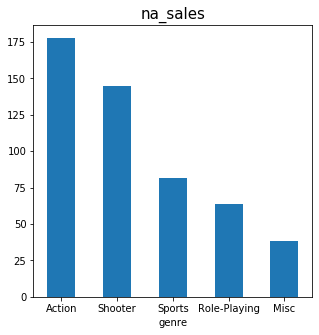

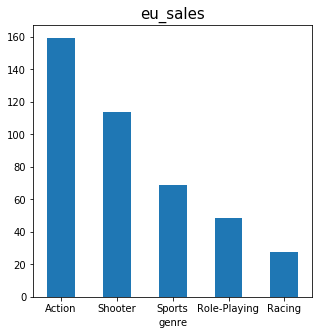

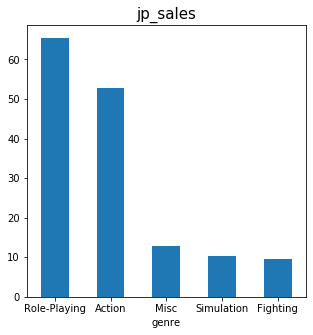

In [60]:
for i in region_of_sale:
    actual_df.groupby('genre')[i].sum().sort_values(ascending=False).head().plot(kind='bar', figsize=(5, 5), rot=0)
    plt.title(i, fontsize = 15)
    plt.show()

Судя по графикам, пользователи Северной Америки и Европы предпочитают одни и те же жанры компьютерных игр. Тогда как в Японии рейтинг популярных жанров сильно отличается от рейтинга Северной Америки и Европы. Если для первых самым популярным жанром являются Action, то для Японии - это Role-Playing (жанр Action на втором месте). Популярные в Северной Америке и Европе Shooter и Sports, не популярны в Японии, в топ-5 жанров в Японии появляются Simulation и Fighting.  

Отличие рейтингов популярных платформ и жанров Японии связано прежде всего с культурными особенностями и менталитетом японцев, что отражено в жанровой специфике (симуляторы свиданий, платформеры, аркадные автоматы). К тому же японсие пользователи предпочитают местные игры и платформы.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Рассмотрим распределение продаж по рейтингу ESRB (Entertainment Software Rating Board — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде).

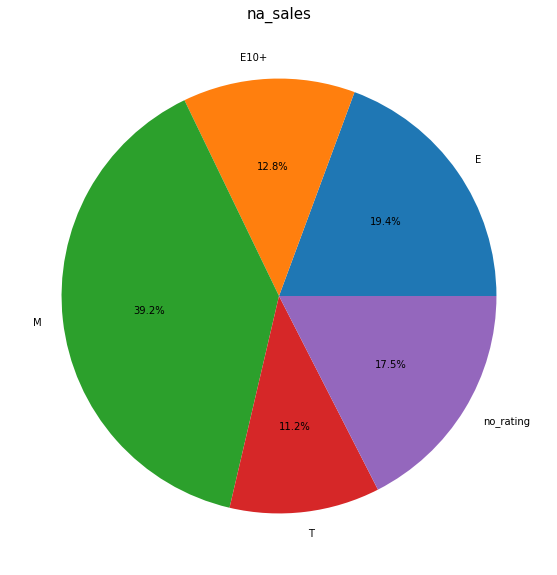

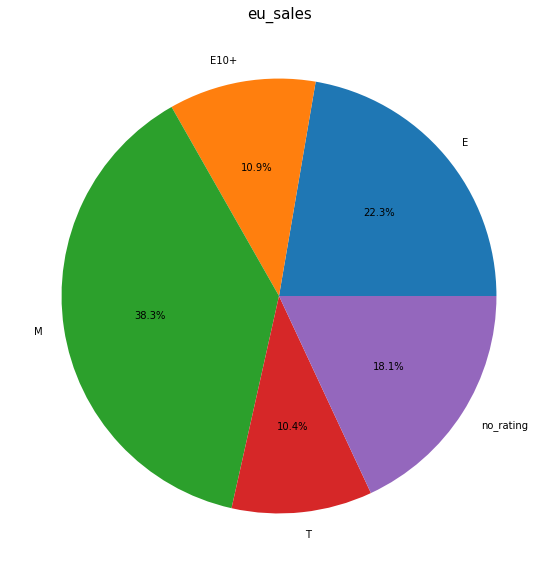

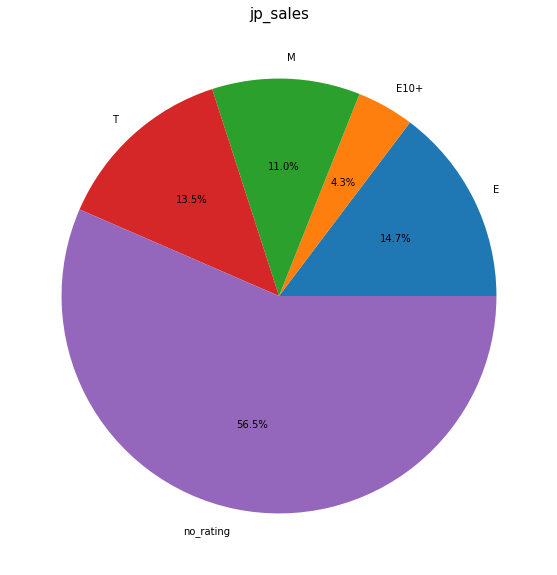

In [61]:
for i in region_of_sale:
    region_rating_sale = actual_df.groupby('rating')[i].sum()
    region_rating_sale = region_rating_sale.append(pd.Series(actual_df[actual_df['rating'].isna()][i].sum(), index=['no_rating']))
    region_rating_sale.plot(kind='pie', subplots=True, figsize=(10, 10), autopct='%1.1f%%')
    plt.title(i, fontsize = 15)
    plt.ylabel('')
    plt.show()

Расшифровка рейтингов:
* **E** («Everyone») — «Для всех»
* **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше»
* **M** («Mature») — «Для взрослых»
* **T** («Teen») — «Подросткам»

В Северной Америке и Европе наиболее популярны игры с рейтингом "Для взрослых" (для каждого региона более 38% продаж) и "Для всех". Для Японии слишком велико количество игр без рейтинга (более 50%), чтобы говорить о влиянии рейтинга на продажи. Т.к.  большое количество игр, которые преобретают в Японии, не популярны в Северной Америке, то возможно ESRB, специализирующаяся на компьютерных играх США и Канаде, не определяет рейтинги для них.

### Вывод

Предпочтения пользователей из Северной Америки и Европы очень похожи, пользователи из Японии выбирают другие игры. Наиболее популярной игрой в **Северной Америке** является игра **в жанре Action на платформе X360 с рейтингом "Для взрослых"**. Средний пользователь из Европы выберет игру **в жанре Action на платформе PS4 с рейтингом "Для взрослых"**. В **Японии** предпочтение отдадут игре **в жанре Role-Playing на платформе 3DS**.

## Шаг 5. Проверка гипотез

### Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Для проверки данной гипотезы воспользуемся методом проверки гипотезы о равенстве средних двух генеральных совокупностей.  
Нулевую гипотезу сформулируем следующим образом:  
**H₀ - средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.**  
Альтернативная гипотеза будет звучать следующим образом:  
**H₁ - средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.**  
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var).

Создадим выборку для каждой платформы с известным пользовательским рейтингом.

In [62]:
xone_array = df.query('platform == "XOne" and user_score >= 0 and year_of_release >= 2012')['user_score']
pc_array = df.query('platform == "PC" and user_score >= 0 and year_of_release >= 2012')['user_score']

Перед проверкой гипотезы проверим дисперсии выборок, чтобы корректно определить атрибут equal_var в Т–тесте.

In [63]:
xone_user_score_var = np.var(xone_array, ddof=1)
pc_user_score_var = np.var(pc_array, ddof=1)

print('Дисперсия XOne-выборки:', '{:.2f}'.format(xone_user_score_var))
print('Дисперсия PC-выборки:', '{:.2f}'.format(pc_user_score_var))

if min(xone_user_score_var, pc_user_score_var)/max(xone_user_score_var, pc_user_score_var) > 0.05:
    print('Разница больше 5%')
else:
    print('Разница меньше 5%')

Дисперсия XOne-выборки: 1.91
Дисперсия PC-выборки: 2.77
Разница больше 5%


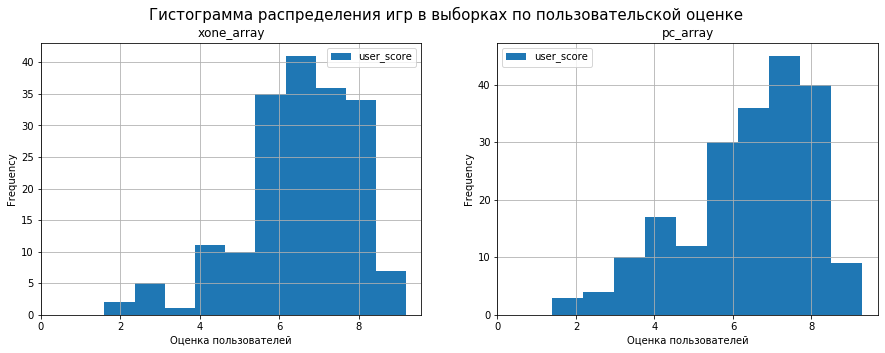

Средний пользовательский рейтинг XOne-выборки: 6.52
Средний пользовательский рейтинг PC-выборки: 6.43


In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
fig.suptitle('Гистограмма распределения игр в выборках по пользовательской оценке', fontsize = 15)
ax1.set_title('xone_array')
ax2.set_title('pc_array')
ax1.set_xlabel('Оценка пользователей')
ax1.set_ylabel('Количество игр')
ax2.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Количество игр')

xone_array.plot(kind='hist', bins=10, grid=True, legend=True, xlim=0, ax=ax1)
pc_array.plot(kind='hist', bins=10, grid=True, legend=True, xlim=0, ax=ax2)

plt.show()

print('Средний пользовательский рейтинг XOne-выборки:', '{:.2f}'.format(xone_array.mean()))
print('Средний пользовательский рейтинг PC-выборки:', '{:.2f}'.format(pc_array.mean()))

Применим общепринятое пороговое значение — 5%: если p-value меньше него, то отвергнем нулевую гипотезу.

In [65]:
alpha = .05

results = st.ttest_ind(
    xone_array, 
    pc_array,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


#### Вывод

Полученное значение p-value говорит о том, что есть большая вероятность получить различия в средних пользовательских рейтингах платформ Xbox One и PC случайно.

### Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"

Для проверки данной гипотезы воспользуемся методом проверки гипотезы о равенстве средних двух генеральных совокупностей.  
Нулевую гипотезу сформулируем следующим образом:  
**H₀ - средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.**  
Альтернативная гипотеза будет звучать следующим образом:  
**H₁ - средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.**  
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var).

Создадим выборку для каждой платформы.

In [66]:
action_array = actual_df.query('genre == "Action" and user_score >= 0')['user_score']
sports_array = actual_df.query('genre == "Sports" and user_score >= 0')['user_score']

Перед проверкой гипотезы проверим дисперсии выборок, чтобы корректно определить атрибут equal_var в Т–тесте.

In [67]:
action_user_score_var = np.var(action_array, ddof=1)
sports_user_score_var = np.var(sports_array, ddof=1)

print('Дисперсия Action-выборки:', '{:.2f}'.format(action_user_score_var))
print('Дисперсия Sports-выборки:', '{:.2f}'.format(sports_user_score_var))

if min(xone_user_score_var, pc_user_score_var)/max(xone_user_score_var, pc_user_score_var) > 0.05:
    print('Разница больше 5%')
else:
    print('Разница меньше 5%')

Дисперсия Action-выборки: 1.89
Дисперсия Sports-выборки: 3.04
Разница больше 5%


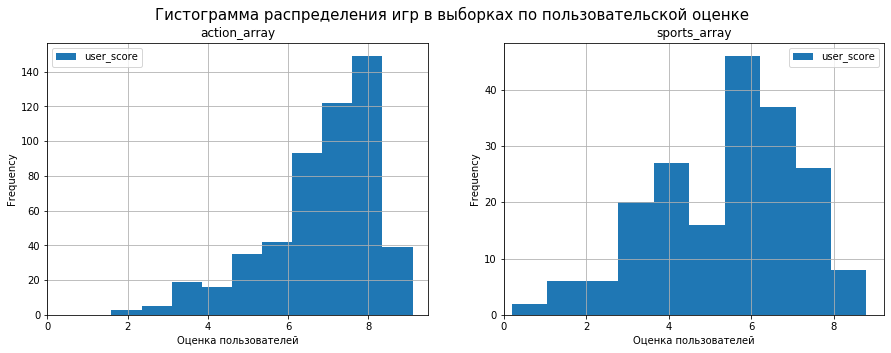

Средний пользовательский рейтинг Action-выборки: 6.83
Средний пользовательский рейтинг Sports-выборки: 5.46


In [68]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
fig.suptitle('Гистограмма распределения игр в выборках по пользовательской оценке', fontsize = 15)
ax1.set_title('action_array')
ax2.set_title('sports_array')
ax1.set_xlabel('Оценка пользователей')
ax1.set_ylabel('Количество игр')
ax2.set_xlabel('Оценка пользователей')
ax2.set_ylabel('Количество игр')

action_array.plot(kind='hist', bins=10, grid=True, legend=True, xlim=0, ax=ax1)
sports_array.plot(kind='hist', bins=10, grid=True, legend=True, xlim=0, ax=ax2)

plt.show()

print('Средний пользовательский рейтинг Action-выборки:', '{:.2f}'.format(action_array.mean()))
print('Средний пользовательский рейтинг Sports-выборки:', '{:.2f}'.format(sports_array.mean()))

Применим общепринятое пороговое значение — 5%: если p-value меньше него, то отвергнем нулевую гипотезу.

In [69]:
alpha = .05

results = st.ttest_ind(
    action_array, 
    sports_array,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.98945806646755e-20
Отвергаем нулевую гипотезу


#### Вывод

Значение p-value очень мало: меньше 1%, т.о. нулевая гипотеза отвергнута - средние пользовательские рейтинги жанров Action и Sports не равны.

## Шаг 6. Общий вывод

Проведя исследовательский анализ данным, выяснили, что с 1995 года начинает расти количество выпущенных игр для консолей и PC (до 1994 года выпускалось меньше 100 игр в год). На 2008-2009 годы приходится пик количества выпущенных игр, после которого следует резкий спад.  
Жизненный цикл консольной платформы составляет примерно 10 лет, пик количества выпущенных игр для каждой платформы приходится примерно на 5 год.  
За последние 5 лет рост продаж наблюдается только для двух платформ - XOne и PS4. При этом продажи игр на платформе PS4 в 2015 году почти в 2 раза превышают продажи игр на платформе XOne. Для обоих платформ, PS4 и XOne, в потенциале ожидается пик продаж в 2017 году.  
В 2017 году потенциально прибыльными будут оставаться платформы PS3, X360, 3DS, WiiU, PС.  
Чаще всего у игр низкие продажи, но много выбросов со сверхвысокими продажами. За последние 5 лет самые высокие средние продажи у игр на платформах X360 и PS4, на втором месте игры на Wii и XOne.  

Изучая взаимосвязь продаж с оценками пользователей и критиков, выяснили, что большее влияние на продажи оказывают оценки критиков, а оценки пользователей обычно не влияют на продажи. Исключение - игры на платформах WiiU и 3DS - на продажи оказывают влияние оценки пользователей, при этом для платформы WiiU это влияние даже большее, чем от оценки критиков. Для PC: низкая взаимосвязь с оценкой критиков (коэффициент корреляции 0,24) и с оценкой пользователей, причем последняя еще и обратная (-0,12). 

Среди жанров наиболее популярны Shooter, Platform, Sports, самые низкие средними продажи у жанров Strategy, Puzzle, Adventure.

Предпочтения пользователей из Северной Америки и Европы очень похожи. Наиболее популярной игрой в Северной Америке является игра в жанре Action на платформе X360 с рейтингом "Для взрослых". Средний пользователь из Европы выберет игру в жанре Action на платформе PS4 с рейтингом "Для взрослых". Япония кардинально отличается от других регионов: в Японии предпочтение отдадут игре в жанре Role-Playing на платформе 3DS.

Результаты проверки гипотез: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action и Sports разные.  

Исходя из всех данных можно предположить, что для мировых продаж в 2017 году выгоднее всего будут игры для платформы PS4 с жанром Shooter и рейтингом "Для взрослых", но для максимальных продах лучше всего учитывать особенности и предпочтения каждого региона.